In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('/content/car_data.csv')

In [3]:
# Convert 'Gender' to numerical values (0 for Male, 1 for Female)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [4]:
# Drop 'User ID' as it's not useful for classification
data = data.drop('User ID', axis=1)

In [5]:
# Split dataset into features (X) and target (y)
X = data.drop('Purchased', axis=1).values
y = data['Purchased'].values

In [6]:
# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [8]:
# Implement the K-NN algorithm
def knn(X_train, y_train, X_test, k=3):
    y_pred = []

    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_neighbors = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_neighbors]
        y_pred.append(np.argmax(np.bincount(k_labels)))

    return np.array(y_pred)

In [9]:
# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [10]:
# Function to plot k vs accuracy
def plot_k_vs_accuracy(X_train, y_train, X_test, y_test, max_k=20):
    accuracies = []
    k_values = list(range(1, max_k + 1))

    for k in k_values:
        y_pred = knn(X_train, y_train, X_test, k)
        accuracies.append(accuracy(y_test, y_pred))

    # Plot k vs accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('k vs Accuracy')
    plt.grid(True)
    plt.show()

    best_k = k_values[np.argmax(accuracies)]
    best_acc = max(accuracies)
    return best_k, best_acc

In [11]:
# Test the K-NN classifier
y_pred = knn(X_train, y_train, X_test, k=3)


In [12]:
# Calculate accuracy
acc = accuracy(y_test, y_pred)
print(f"Accuracy with k=3: {acc}")

Accuracy with k=3: 0.765


In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[98 14]
 [33 55]]


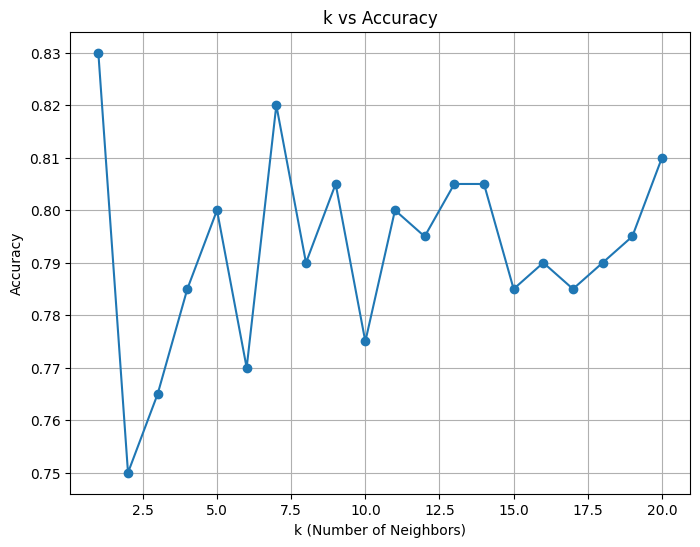

Best k: 1 with accuracy: 0.83


In [14]:
# Plot k vs accuracy and find the best k
best_k, best_acc = plot_k_vs_accuracy(X_train, y_train, X_test, y_test)
print(f"Best k: {best_k} with accuracy: {best_acc}")